In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

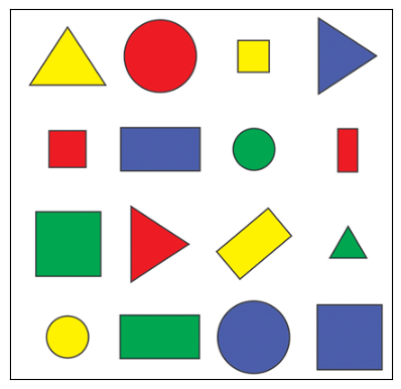

In [2]:
img = cv2.imread("test_2.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.show()

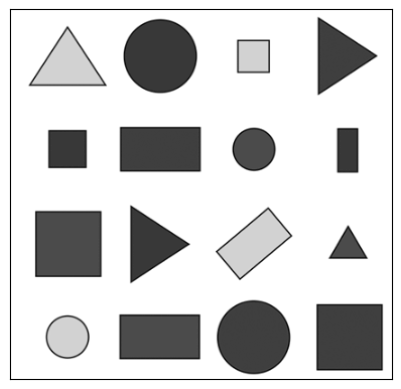

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

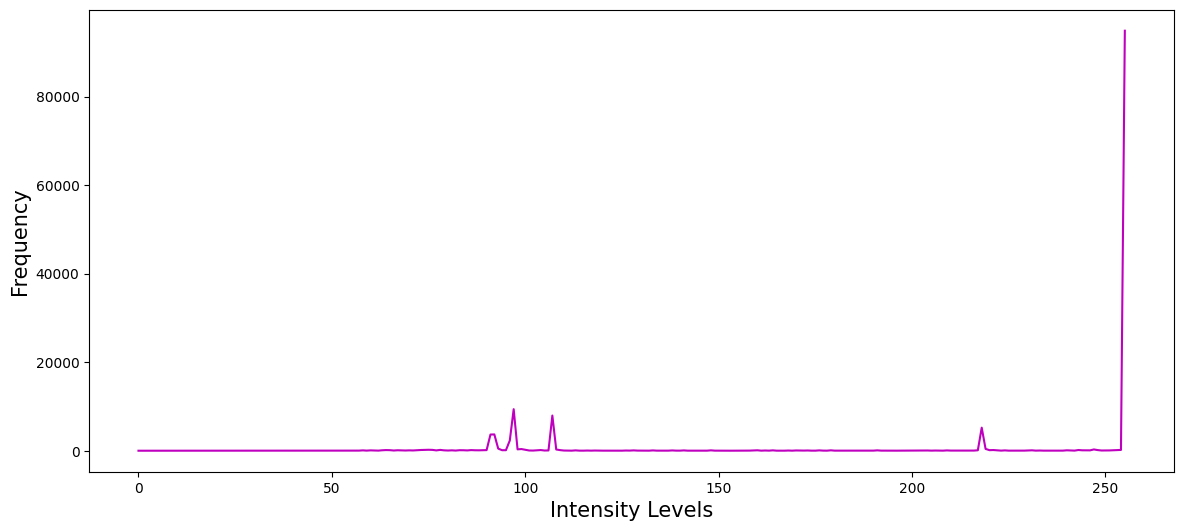

In [4]:
img_gray_hist_values = cv2.calcHist([img_gray],channels = [0], mask = None, histSize = [256], ranges = [0,256])

plt.figure(figsize=(14,6))
plt.plot(img_gray_hist_values,'m')
plt.xlabel("Intensity Levels", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

## Global Thresholding

cv2.THRESH_BINARY: If pixel intensity is greater than the threshold, sets the value to 255; else, sets it to 0.

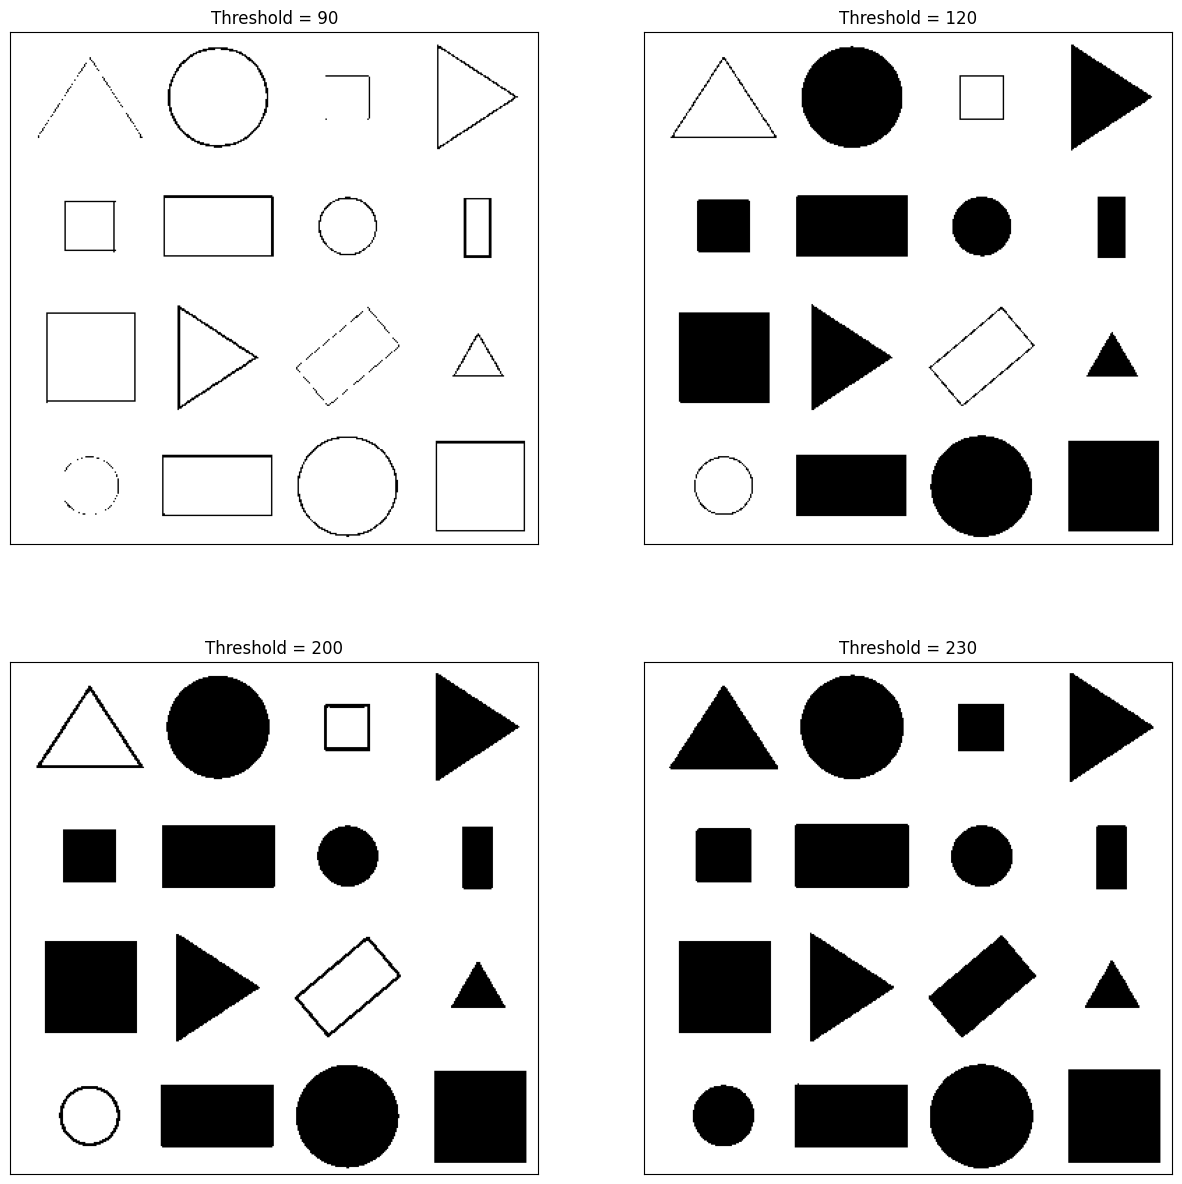

In [5]:
_, global_threshold_90 = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY, )
_, global_threshold_120 = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY, )
_, global_threshold_200 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY, )
_, global_threshold_230 = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY, )

plt.figure(figsize = (15,15))
titles = ["Threshold = 90", "Threshold = 120", "Threshold = 200", "Threshold = 230"]
for idx, thres in enumerate([global_threshold_90, global_threshold_120, global_threshold_200, global_threshold_230]):
    plt.subplot(2,2,idx+1)
    plt.imshow(thres, 'gray')
    plt.title(titles[idx])
    plt.xticks([]), plt.yticks([])

cv2.THRESH_BINARY_INV: Inversion of cv2.THRESH_BINARY.

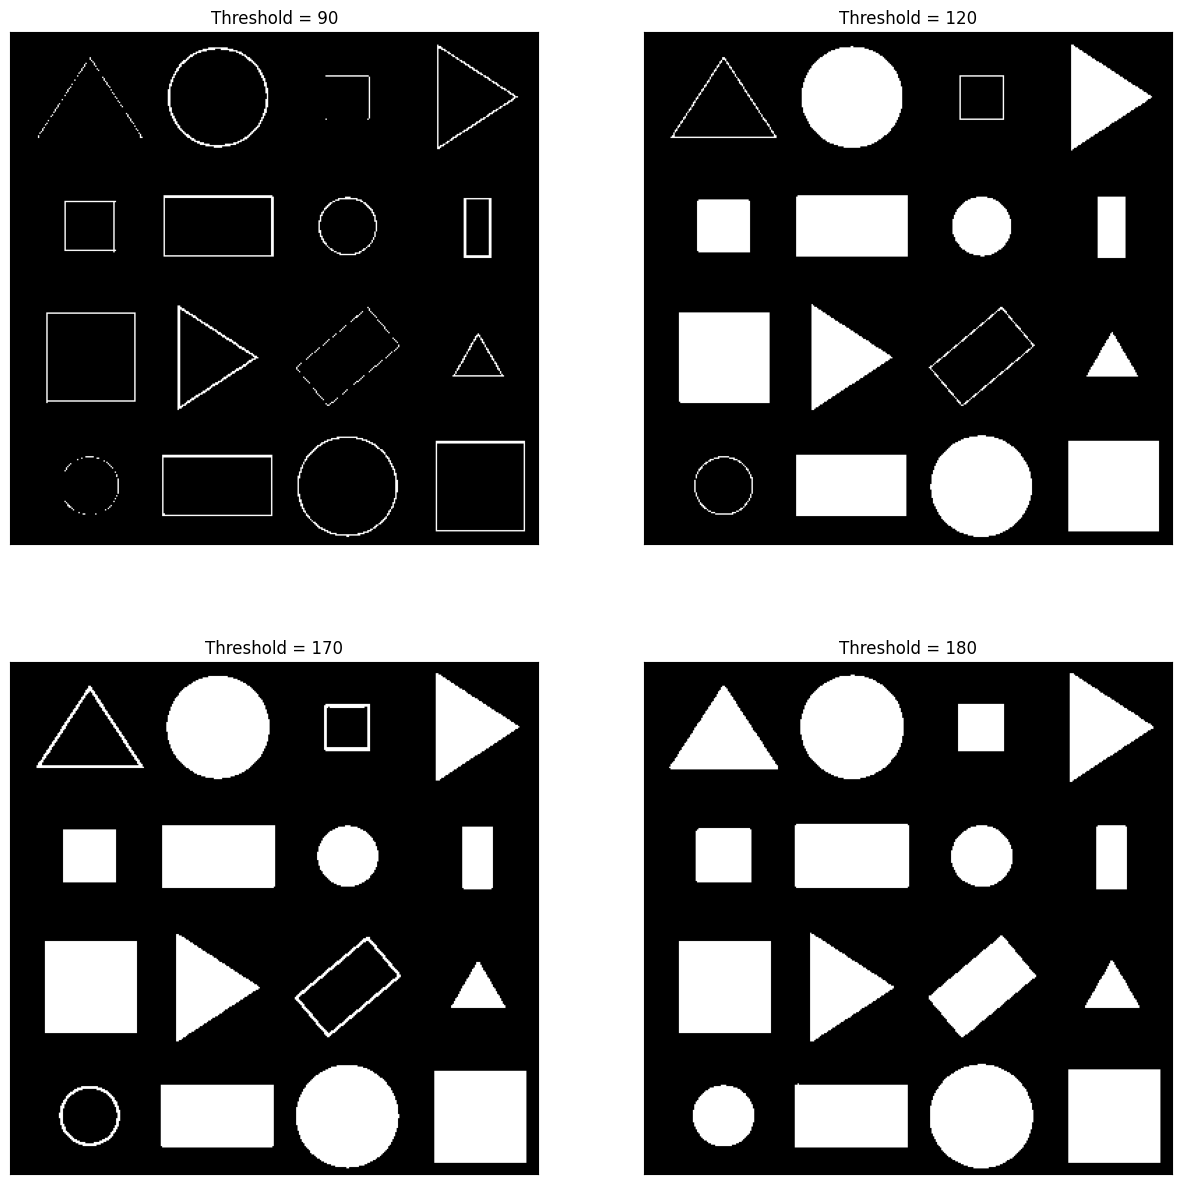

In [6]:
_, global_threshold_90 = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY_INV, )
_, global_threshold_120 = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY_INV, )
_, global_threshold_200 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV, )
_, global_threshold_230 = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY_INV, )

plt.figure(figsize = (15,15))
titles = ["Threshold = 90", "Threshold = 120", "Threshold = 170", "Threshold = 180"]
for idx, thres in enumerate([global_threshold_90, global_threshold_120, global_threshold_200, global_threshold_230]):
    plt.subplot(2,2,idx+1)
    plt.imshow(thres, 'gray')
    plt.title(titles[idx])
    plt.xticks([]), plt.yticks([])

cv2.THRESH_TRUNC: If pixel intensity is greater than the threshold, it is set to be the same as the threshold(truncated); else, the value remains the same.

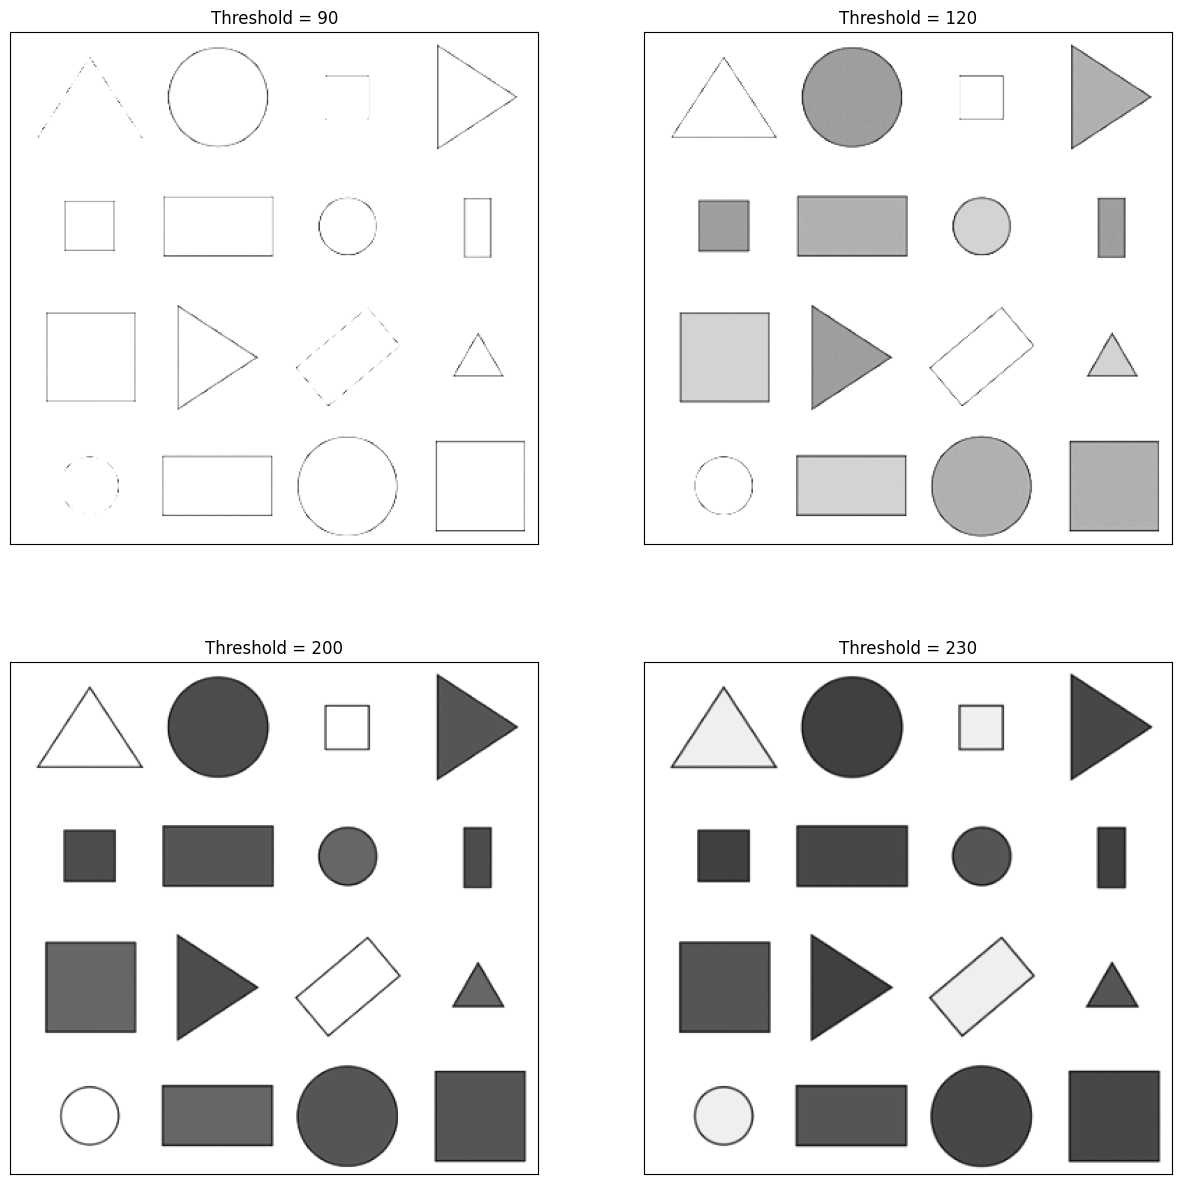

In [7]:
_, global_threshold_90 = cv2.threshold(img_gray, 90, 255, cv2.THRESH_TRUNC )
_, global_threshold_120 = cv2.threshold(img_gray, 120, 255, cv2.THRESH_TRUNC)
_, global_threshold_200 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_TRUNC)
_, global_threshold_230 = cv2.threshold(img_gray, 230, 255, cv2.THRESH_TRUNC)

plt.figure(figsize = (15,15))
titles = ["Threshold = 90", "Threshold = 120", "Threshold = 200", "Threshold = 230"]
for idx, thres in enumerate([global_threshold_90, global_threshold_120, global_threshold_200, global_threshold_230]):
    plt.subplot(2,2,idx+1)
    plt.imshow(thres, 'gray')
    plt.title(titles[idx])
    plt.xticks([]), plt.yticks([])

cv2.THRESH_TOZERO: For all the pixels with intensity less than the threshold, the intensity value is set to 0

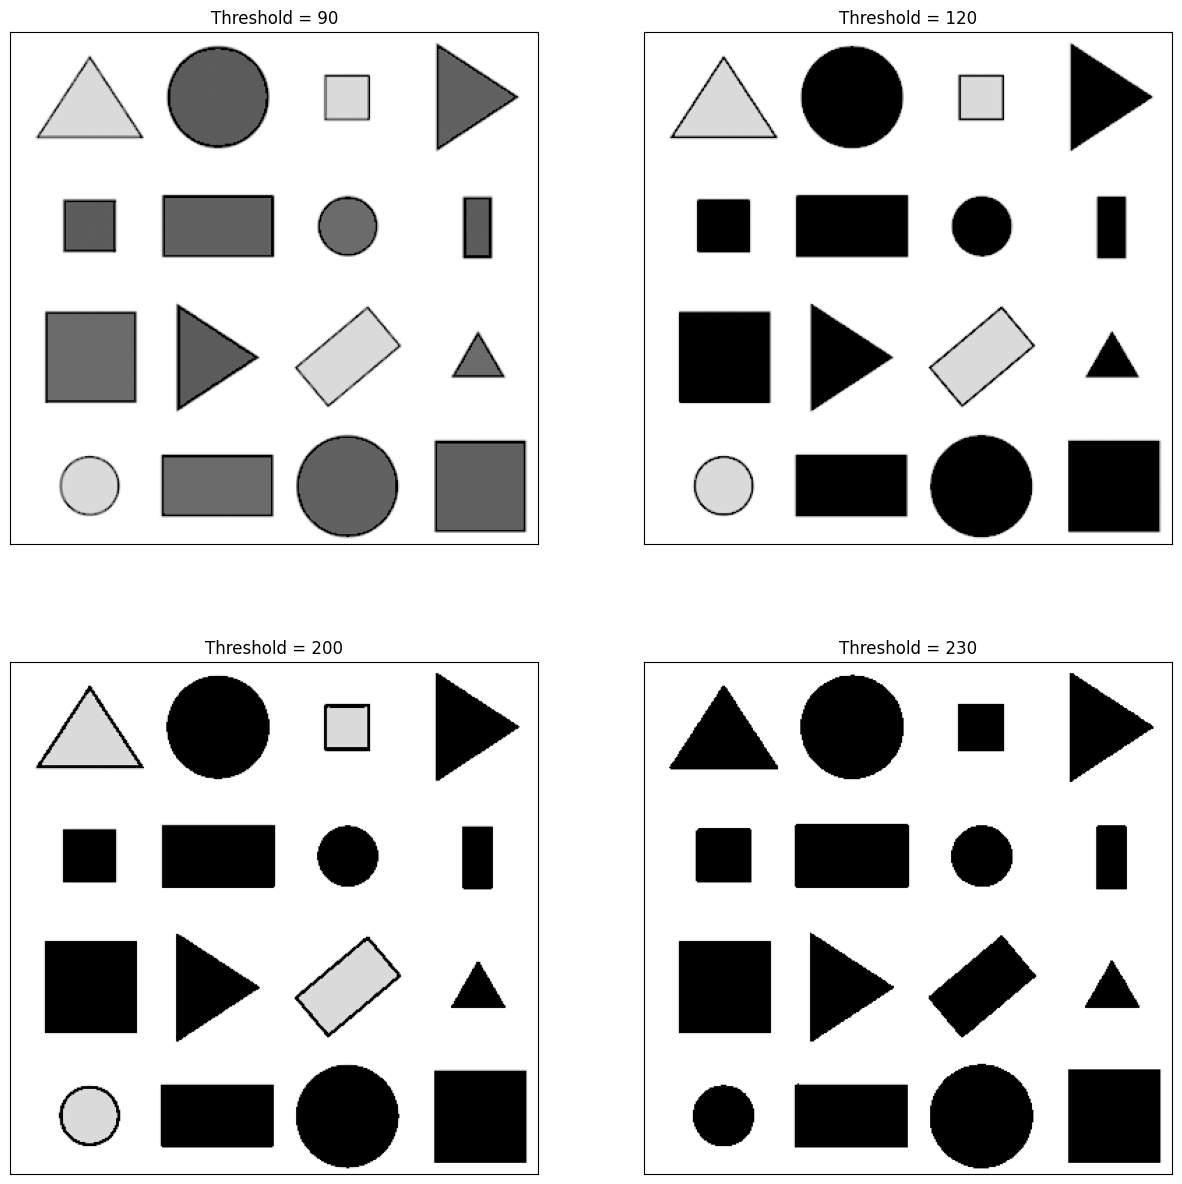

In [8]:
_, global_threshold_90 = cv2.threshold(img_gray, 90, 255, cv2.THRESH_TOZERO)
_, global_threshold_120 = cv2.threshold(img_gray, 120, 255, cv2.THRESH_TOZERO)
_, global_threshold_200 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_TOZERO)
_, global_threshold_230 = cv2.threshold(img_gray, 230, 255, cv2.THRESH_TOZERO)

plt.figure(figsize = (15,15))
titles = ["Threshold = 90", "Threshold = 120", "Threshold = 200", "Threshold = 230"]
for idx, thres in enumerate([global_threshold_90, global_threshold_120, global_threshold_200, global_threshold_230]):
    plt.subplot(2,2,idx+1)
    plt.imshow(thres, 'gray')
    plt.title(titles[idx])
    plt.xticks([]), plt.yticks([])

cv2.THRESH_TOZERO_INV: Inversion of cv2.THRESH_TOZERO.

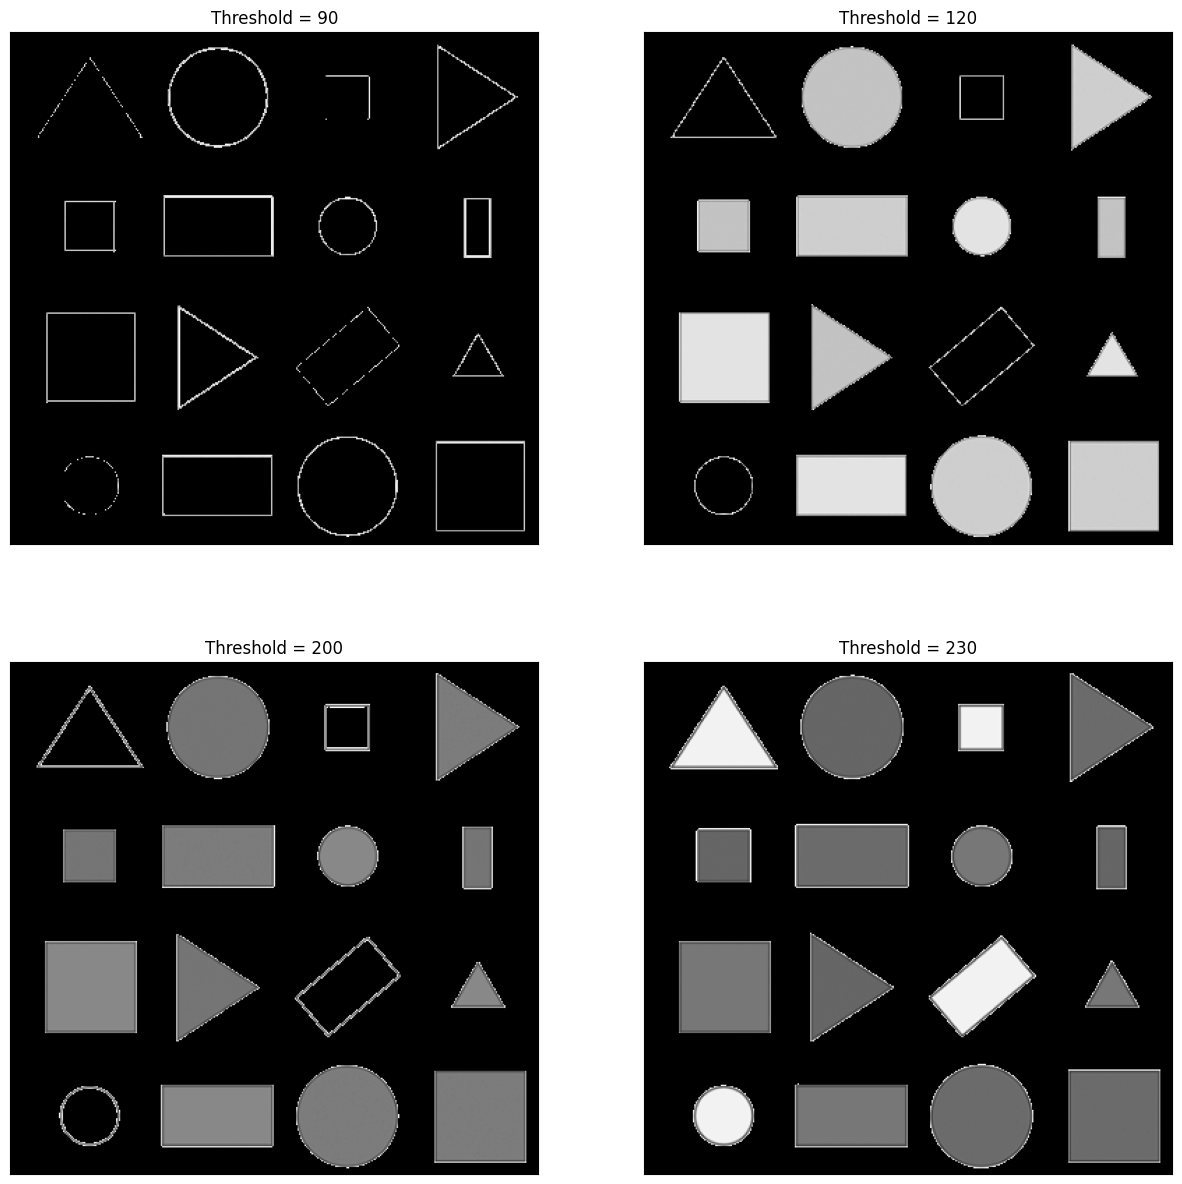

In [9]:
_, global_threshold_90 = cv2.threshold(img_gray, 90, 255, cv2.THRESH_TOZERO_INV)
_, global_threshold_120 = cv2.threshold(img_gray, 120, 255, cv2.THRESH_TOZERO_INV)
_, global_threshold_200 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_TOZERO_INV)
_, global_threshold_230 = cv2.threshold(img_gray, 230, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize = (15,15))
titles = ["Threshold = 90", "Threshold = 120", "Threshold = 200", "Threshold = 230"]
for idx, thres in enumerate([global_threshold_90, global_threshold_120, global_threshold_200, global_threshold_230]):
    plt.subplot(2,2,idx+1)
    plt.imshow(thres, 'gray')
    plt.title(titles[idx])
    plt.xticks([]), plt.yticks([])

## Visualising different Global Thresholdings

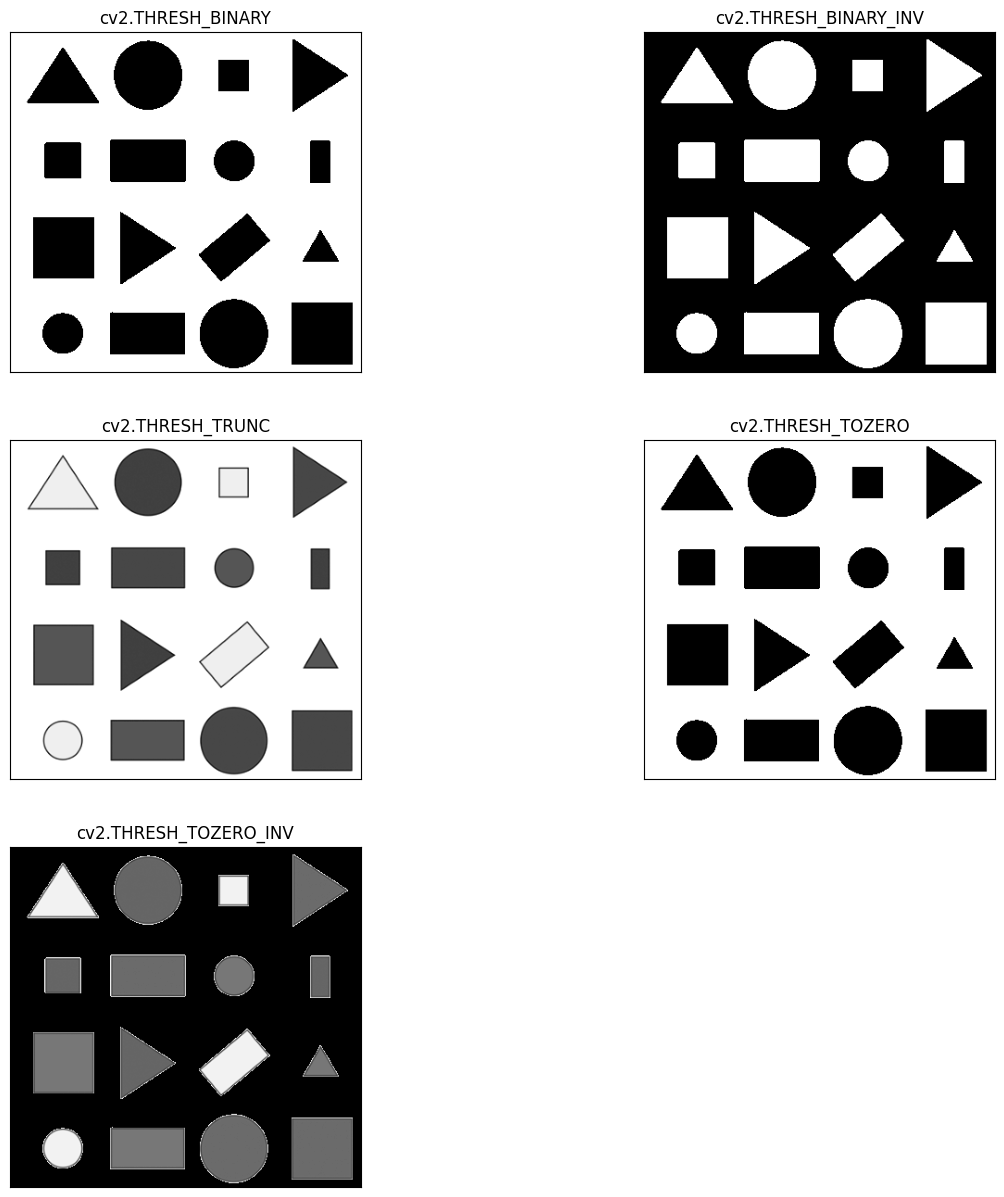

In [10]:
_, global_THRESH_BINARY = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY, )
_, global_THRESH_BINARY_INV = cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY_INV, )
_, global_THRESH_TRUNC = cv2.threshold(img_gray, 230, 255, cv2.THRESH_TRUNC)
_, global_THRESH_TOZERO = cv2.threshold(img_gray, 230, 255, cv2.THRESH_TOZERO)
_, global_THRESH_TOZERO_INV = cv2.threshold(img_gray, 230, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize = (15,15))
titles = ["cv2.THRESH_BINARY", "cv2.THRESH_BINARY_INV", "cv2.THRESH_TRUNC", "cv2.THRESH_TOZERO", "cv2.THRESH_TOZERO_INV"]
for idx, thres in enumerate([global_THRESH_BINARY, global_THRESH_BINARY_INV, global_THRESH_TRUNC, global_THRESH_TOZERO, global_THRESH_TOZERO_INV]):
    plt.subplot(3,2,idx+1)
    plt.imshow(thres, 'gray')
    plt.title(titles[idx])
    plt.xticks([]), plt.yticks([])

## Adaptive Thresholding

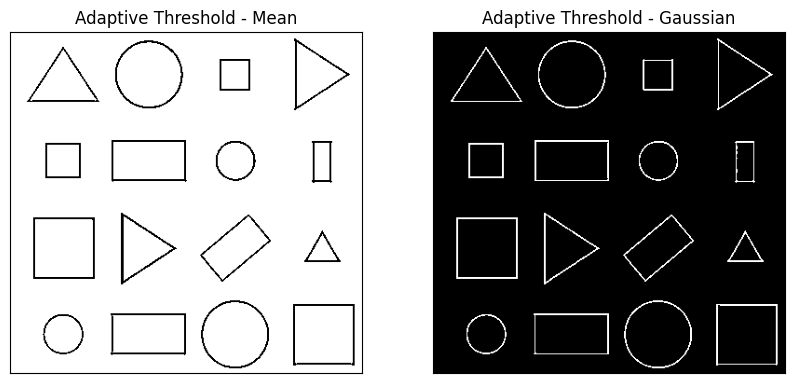

In [11]:
adaptive_threshold_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 6)
adaptive_threshold_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 6)

plt.figure(figsize = (10,10))
titles = ["Adaptive Threshold - Mean", "Adaptive Threshold - Gaussian"]
for idx, thres in enumerate([adaptive_threshold_mean, adaptive_threshold_gaussian]):
    plt.subplot(1,2,idx+1)
    plt.imshow(thres, 'gray')
    plt.title(titles[idx])
    plt.xticks([]), plt.yticks([])

## Otsu Thresholding

Otsu Thresholding is a Global Binarization technique where the threshold value is selected automatically, assuming that the image's foreground and background create a bimodal distribution with 2 peaks(representing 2 classes). The optimal value between the two histogram peak values is usually considered the threshold value in this method

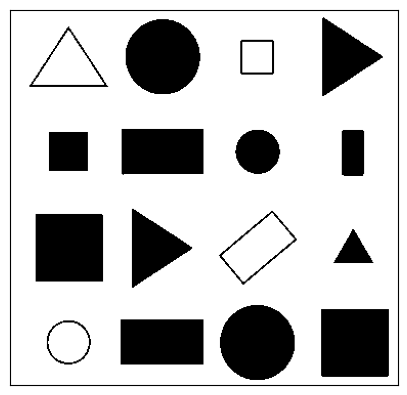

In [12]:
_, otsu_thresholding = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize = (5,5))
plt.imshow(otsu_thresholding, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

## Canny edge detection

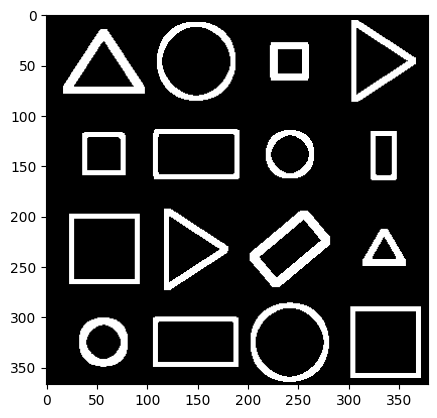

In [13]:
img_Canny = cv2.Canny(img_gray, 100, 255)
kernel = np.ones((5,5))
imgDil = cv2.dilate(img_Canny, kernel, iterations=1)
plt.imshow(imgDil, cmap='gray')

In [14]:
def getContours(img, imgContour):
  contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  print(f"Number of countours found: {len(contours)}")
  area_arr = []

  for cnt in contours:
    area = cv2.contourArea(cnt)
    cv2.drawContours(imgContour, cnt, -1, (255, 0, 255), 2)
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
    print("pts: ", len(approx))
    x, y, w, h = cv2.boundingRect(approx)
    cv2.putText(imgContour, "Points: " + str(len(approx)), (x+5,y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0), 1)
    cv2.putText(imgContour, "Area: " + str(int(area)), (x+5,y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0), 1)

getContours(adaptive_threshold_gaussian, img_rgb)

Number of countours found: 16
pts:  7
pts:  4
pts:  4
pts:  8
pts:  3
pts:  4
pts:  4
pts:  3
pts:  4
pts:  4
pts:  7
pts:  4
pts:  4
pts:  3
pts:  8
pts:  3


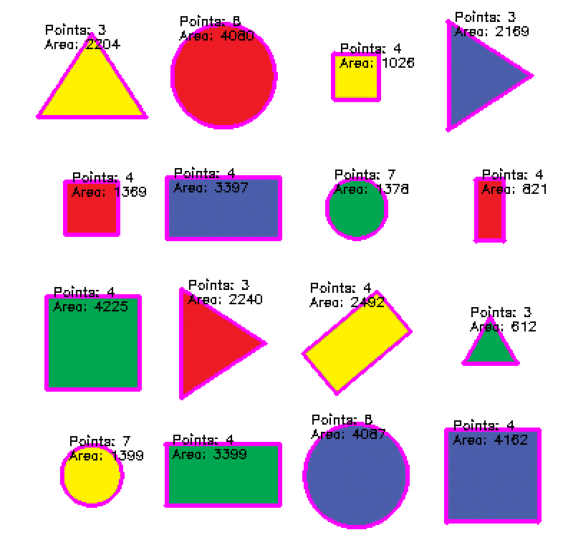

In [15]:
plt.figure(figsize=(7,7))
plt.imshow(img_rgb, cmap='gray')
plt.axis("off")
plt.show()